#**Step (a): Load MNIST Dataset**

In [24]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target'].astype(np.uint8)

#**Step (b): Split Data (60k train, 10k test)**

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)

#**Step (c): Train Classifiers**
##**🔹 1. SGD Classifier (hinge loss = SVM)**

In [27]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='hinge', random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

#**🔹 2. Random Forest Classifier**

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
import numpy as np
print(np.bincount(rf_clf.predict(X_test)))

[ 998 1125 1003 1013  966  895  995 1037  966 1002]


##**Step (d): Evaluate (Confusion Matrix + Classification Report)**

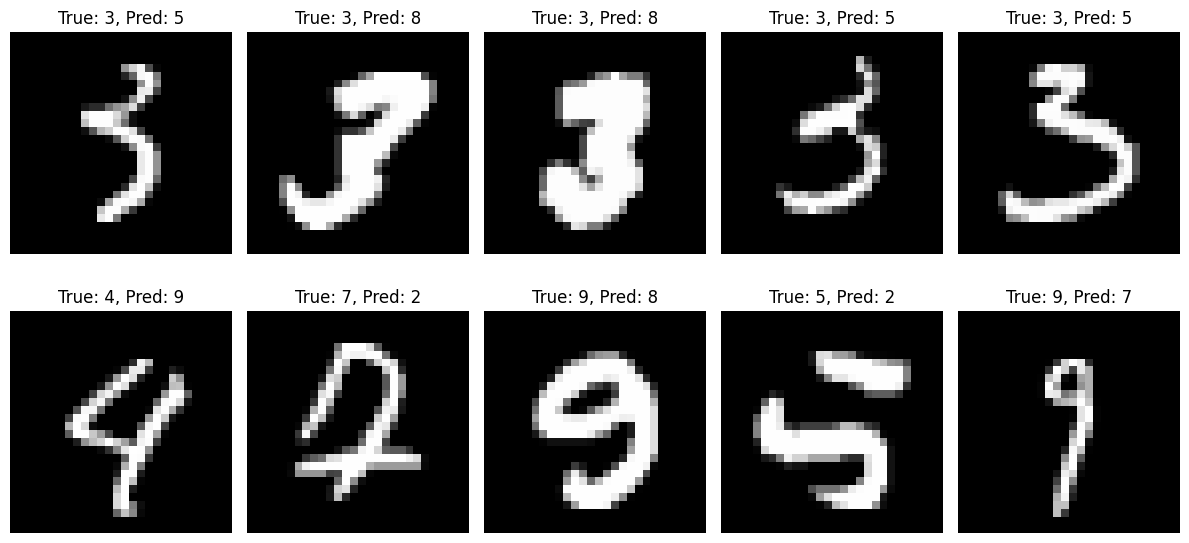

In [29]:
import matplotlib.pyplot as plt

def show_misclassified(X_test, y_test, y_pred, count=10):
    misclassified = np.where(y_test != y_pred)[0]
    errors = [(index, X_test[index], y_test[index], y_pred[index]) for index in misclassified]

    plt.figure(figsize=(12, 6))
    for i, (idx, img, actual, pred) in enumerate(errors[:count]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(img.reshape(28, 28), cmap='gray')
        plt.title(f"True: {actual}, Pred: {pred}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_misclassified(X_test, y_test, y_pred_rf)

#**Digit Prediction Function for Gradio Interface**

In [30]:
import numpy as np
import cv2
import gradio as gr
from PIL import Image

def predict_digit(image):
    # Convert to grayscale if it's RGB (e.g., green digit)
    image = Image.fromarray(image).convert('L')  # force grayscale
    image = np.array(image)

    # Resize to 28x28
    image = cv2.resize(image, (28, 28), interpolation=cv2.INTER_AREA)

    # Invert colors: MNIST is black digit on white bg
    image = 255 - image

    # Normalize pixel values
    image = image / 255.0

    # Flatten to match model input
    image = image.reshape(1, -1)

    # Predict
    prediction = rf_clf.predict(image)[0]
    return int(prediction)


##**Gradio Interface for Real-Time Digit Recognition**

In [31]:
gr.Interface(
    fn=predict_digit,
    inputs=gr.Image(image_mode="L"),
    outputs="label",
    title="MNIST Digit Recognizer"
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b8bbae8000e2ddffa6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


##**🔁 Implement One Improvement: Data Augmentation**

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Re-train with scaled data
rf_clf.fit(X_train_scaled, y_train)
print("New Accuracy:", rf_clf.score(X_test_scaled, y_test))

New Accuracy: 0.9684


#**Target Achieved**

In [13]:
from sklearn.metrics import accuracy_score
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Test Accuracy: 0.9683
